<h3>Questão 5 </h3>
Abra uma imagem e faça as quantizações para 128, 64, 32, 16, 8 e 2 níveis de cinza.




Bibliotecas usadas:

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np



Função para quantizar a imagem


In [2]:
def quantizar_imagem(imagem, niveis_de_cinza): 

    valor_minimo = np.min(imagem) #Encontrando os valores máximo e mínimo da imagem, para definir o intervalo total da imagem. 
    valor_maximo = np.max(imagem) 

    valor = valor_maximo - valor_minimo
    #print('valor maximo', valor_maximo)
    #print('valor mínimo', valor_minimo)

    intervalo = (valor) / niveis_de_cinza #intervalo da quantização
    #print('intervalo', intervalo)

    quantizar_imagem = np.zeros_like(imagem, dtype = np.uint8) #cria uma nova matriz com o mesmo tamanho e formato da matriz imagem (seja ela uma imagem ou qualquer outro tipo de matriz), mas com todos os valores inicializados com 0. 
    #print('elementos',imagem.shape)                                                           #Essa matriz criada terá o tipo de dados np.uint8, o que é ideal para armazenar valores de pixels em tons de cinza.

    for i in range(imagem.shape[0]): #Usando shape para pegar o número de elementos em cada dimensão da imagem
        for j in range(imagem.shape[1]):
            quantizar = np.round((imagem[i, j] - valor_minimo) / intervalo) * intervalo + valor_minimo

            quantizar_imagem[i,j] = quantizar
    return quantizar_imagem

In [3]:
imagem = cv2.imread('images.jpeg',cv2.IMREAD_GRAYSCALE)



In [4]:
if imagem is None:
    print('Erro!')
    exit()

In [5]:
niveis_para_quantizacao = [128, 64, 32, 16, 8, 2]

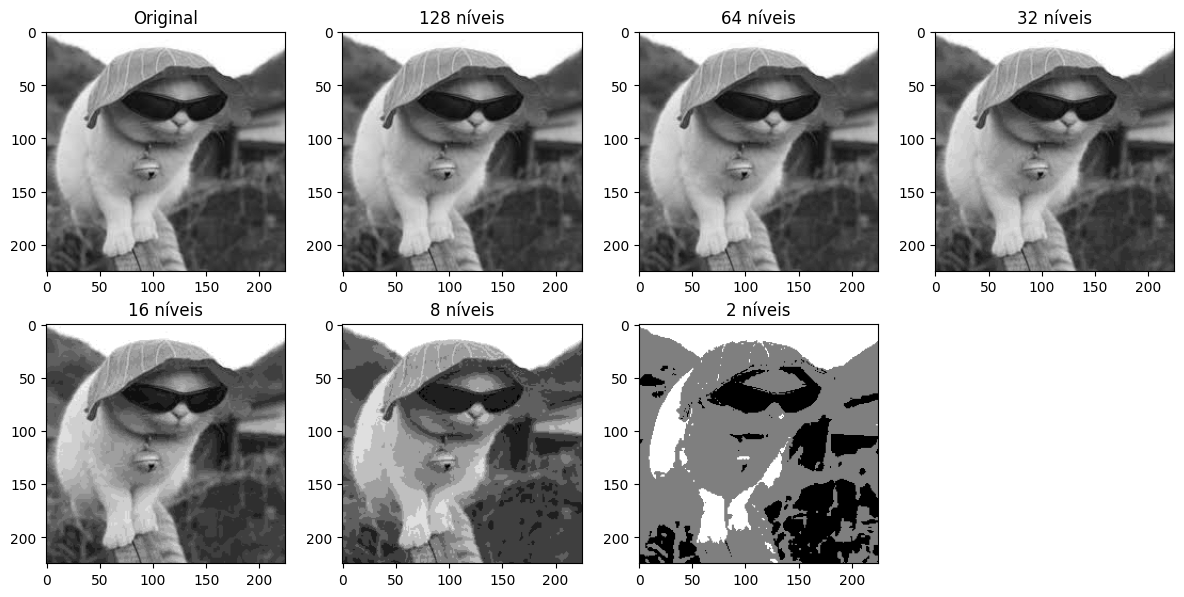

In [6]:
#Plotando imagem original
plt.figure(figsize =(12, 6)) 
plt.subplot(2, 4, 1) 
plt.imshow(imagem, cmap='gray')
plt.title('Original')

#
for i, niveis_de_cinza in enumerate(niveis_para_quantizacao):
  imagem_quantizada = quantizar_imagem(imagem, niveis_de_cinza) 
  plt.subplot(2, 4, i +2)  
  plt.imshow(imagem_quantizada, cmap='gray')
  plt.title(f'{niveis_de_cinza} níveis')

plt.tight_layout()  
plt.show()